# Introdução ao processamento de Imagem - MC920

-----------------------------------------------------------

# Trabalho 2

## Daniel Cardoso Custodio de Oliveira - RA: 169400

In [144]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy

# Funções de Kernels


In [145]:
def floyd_steinberg(img, i, j, k, iMax, jMax, gx,isFliped):
  floyd_steinberg_kernel = np.array([[0,0,7],
                              [3,5,1]]) * 1/16
  if isFliped:
    floyd_steinberg_kernel = np.flip(floyd_steinberg_kernel,axis=1)
  if img[i][j][k] < 128:
    gx[i][j][k] = 0
  else:
    gx[i][j][k] = 255
  erro = img[i][j][k] - (gx[i][j][k])
  for row in range(2):
    for col in range(-1,2):
      if i + col < iMax and j + row >= 0 and j + row < jMax:
        img[i+col][j+row][k] += floyd_steinberg_kernel[row][1+col] * erro

In [146]:
def stevenson_arce(img, i, j, k, iMax, jMax, gx,isFliped):
  stevenson_arce_kernel = np.array([[0,0,0,0,0,32,0],
                            [12,0,26,0,30,0,16],
                            [0,12,0,26,0,12,0],
                            [5,0,12,0,12,0,5]]) * 1/200
  if isFliped:
    stevenson_arce_kernel = np.flip(stevenson_arce_kernel,axis=1)
  if img[i][j][k] < 128:
    gx[i][j][k] = 0
  else:
    gx[i][j][k] = 255
  erro = img[i][j][k] - (gx[i][j][k])
  for row in range(4):
    for col in range(-1,6):
      if i + col < iMax and j + row >= 0 and j + row < jMax:
        img[i+col][j+row][k] += stevenson_arce_kernel[row][1+col] * erro

In [147]:
def burkes(img, i, j, k, iMax, jMax, gx,isFliped ):
  burkes_kernel = np.array([[0,0,0,8,4],
                     [2,4,8,4,2]]) * 1/32
  if isFliped:
    burkes_kernel = np.flip(burkes_kernel,axis=1)
  if img[i][j][k] < 128:
    gx[i][j][k] = 0
  else:
    gx[i][j][k] = 255
  erro = img[i][j][k] - (gx[i][j][k])
  for row in range(2):
    for col in range(-1,4):
      if i + col < iMax and j + row >= 0 and j + row < jMax:
        img[i+col][j+row][k] += burkes_kernel[row][1+col] * erro

In [148]:
def sierra(img, i, j, k, iMax, jMax, gx, isFliped):
  sierra_kernel = (np.array([[0,0,0,5,3],
                     [2,4,5,4,2],
                     [0,2,3,2,0]]) * 1/32)
  if isFliped:
    sierra_kernel = np.flip(sierra_kernel,axis=1)
  if img[i][j][k] < 128:
    gx[i][j][k] = 0
  else:
    gx[i][j][k] = 255
  erro = img[i][j][k] - (gx[i][j][k])
  for row in range(3):
    for col in range(-1,4):
      if i + col < iMax and j + row >= 0 and j + row < jMax:
        img[i+col][j+row][k] += sierra_kernel[row][1+col] * erro

In [149]:
def stucki(img, i, j, k, iMax, jMax, gx,isFliped):
  stucki_kernel = np.array([[0,0,0,8,4],
                     [2,4,8,4,2],
                     [1,2,4,2,1]]) * 1/42
  if isFliped:
    stucki_kernel = np.flip(stucki_kernel,axis=1)
  if img[i][j][k] < 128:
    gx[i][j][k] = 0
  else:
    gx[i][j][k] = 255
  erro = img[i][j][k] - (gx[i][j][k])
  for row in range(3):
    for col in range(-1,4):
      if i + col < iMax and j + row >= 0 and j + row < jMax:
        img[i+col][j+row][k] += stucki_kernel[row][1+col] * erro

In [150]:
def jarvis_judice_ninke(img, i, j, k, iMax, jMax, gx,isFliped):
  jarvis_judice_ninke_kernel = np.array([[0,0,0,7,5],
                                  [3,5,7,5,3],
                                  [1,3,5,3,1]]) * 1/48
  if isFliped:
    jarvis_judice_ninke_kernel = np.flip(jarvis_judice_ninke_kernel,axis=1)
  if img[i][j][k] < 128:
    gx[i][j][k] = 0
  else:
    gx[i][j][k] = 255
  erro = img[i][j][k] - (gx[i][j][k])
  for row in range(3):
    for col in range(-1,4):
      if i + col < iMax and j + row >= 0 and j + row < jMax:
        img[i+col][j+row][k] += jarvis_judice_ninke_kernel[row][1+col] * erro


# Auxiliares

In [151]:
def read_img_color(img):
  aux_img = cv2.imread(img)
  return cv2.cvtColor(aux_img, cv2.COLOR_BGR2RGB)

In [152]:
def scan_image(img,function):
  gx = copy.deepcopy(img)
  img = np.float32(img)
  for k in range(img.shape[2]):
    for i in range(img.shape[0]):
      if i%2 != 0:
        for j in range(img.shape[1]-1, -1, -1):
          function(img, i, j, k, img.shape[0], img.shape[1], gx, True)
      else:
        for j in range(img.shape[1]):
          function(img, i, j, k, img.shape[0], img.shape[1], gx,False)
  return gx

In [153]:
def plot(img,kernel):
  plt.figure(figsize = (8,8))
  plt.imshow(scan_image(read_img_color(img),kernel))

# Imagens 


**Floyd e Steinberg**

Difunde o erro para pixels vizinhos, resultando em pontilhamento de granulação fino e detalhado.

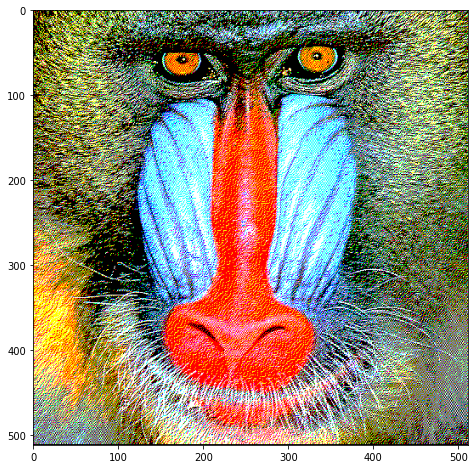

In [154]:
plot("baboon-color.png",floyd_steinberg)

**Stevenson e Arce**

Por ter uma matrzi maior propaga o erro mais distante, assim com menos detalhamento.

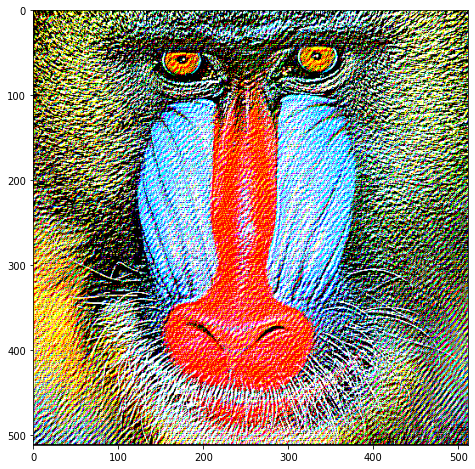

In [155]:
plot("baboon-color.png",stevenson_arce)

**Burkes**

Simplificação de pontilhamento de Stucki.Mais rápido, porém menos limpo.


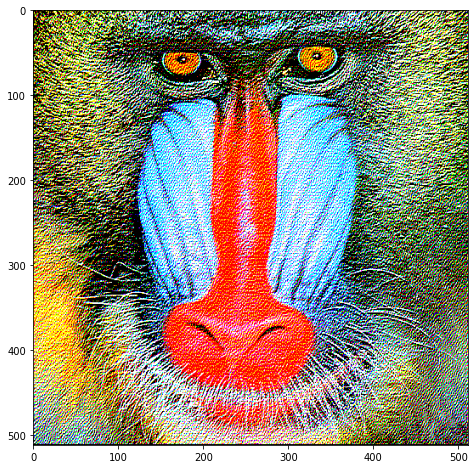

In [156]:
plot("baboon-color.png",burkes)

 **Sierra**

É baseado no algoritimo de Jarvis, Judice e Ninke porém mais simplificado e rápido.


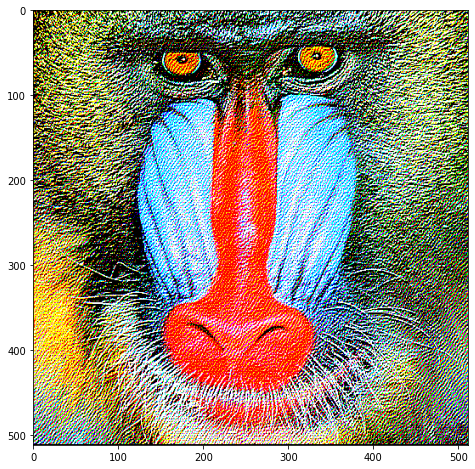

In [157]:
plot("baboon-color.png",sierra)

**Stucki**

É baseado no algoritimo de Jarvis, Judice e Ninke, porém mais rápido. Sua saída tende a ser limpa e nítida.


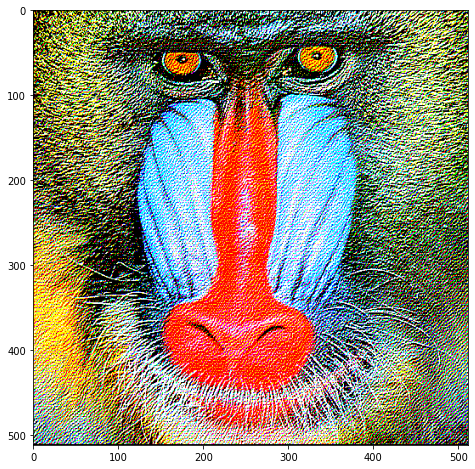

In [158]:
plot("baboon-color.png",stucki)

**Jarvis, Judice e Ninke**

Difunde o erro também para pixels mais afastados. O pontilhado é mais grosso, mas tem menos artefatos visuais.

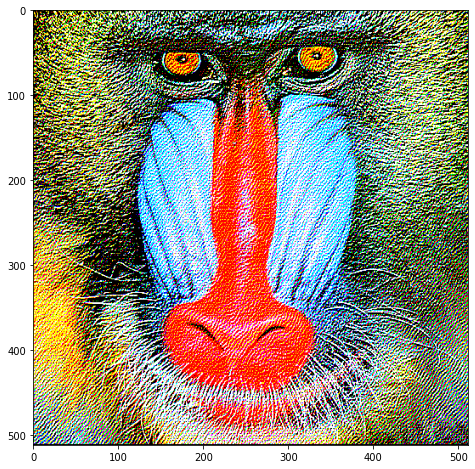

In [159]:
plot("baboon-color.png",jarvis_judice_ninke)